#Project Title : Email Campaign Effectiveness Prediction
#Problem Description

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.

#Introduction:
Email marketing is the act of sending a commercial message, typically to a group of people, using email. In its broadest sense, every email sent to a potential or current customer could be considered email marketing. It involves using email to send advertisements, request business, or solicit sales or donations.

Most importantly, email marketing allows businesses to build relationships with leads, new customers and past customers. It's a way to communicate directly to the customers in their inbox, at a time that is convenient for them. With the right messaging tone and strategies, emails are one of the most important marketing channels.

We all subscribe to many different kinds of businesses through emails because it's required to do so, sometimes to get digital receipts of the things we bought or to get digital information about the business to stay updated. But many of times we do not tend to read an email due to a number of reasons - to name a few would be- no proper structure, too many images, too many links inside the mail, complex vocabulary used or simply too long emails.

The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.
In addition to this, we will be trying to analyze and find all the features that are important for an email to not get ignored.

Alors commençons ! (So let's begin !)

##DATA COLLECTION AND DATA PREPARATION

##Data Summary:
###The data has the following features:
Email_ID — This column contains the email ids of individuals.

Email_type — Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or important email.

Subject_Hotness_Score — It is the email effectiveness score.

Email_Source — It represents the source of the email like sales or marketing or product type email.

Email_Campaign_Type — Campaign type

Total_Past_Communications — This column contains the previous mails from the same source.

Customer_Location — Categorical data which explains the different demographics of the customers.

Time_Email_sent_Category — It has 3 categories 1,2 and 3 which may give us
morning,evening and night time slots.

Word_Count — It contains the no.of words contained in the mail.

Total_Links — Total links from the mail.

Total_Images — The banner images from the promotional email.

Email_Status — It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

In [ ]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report
#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [ ]:
#drive mounting for accessing dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the csv dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Data Science Capstone Projects/Email Campaign Effectiveness Prediction - Prashant Gaikwad/data_email_campaign.csv")

In [ ]:
df.head() #gives first five rows

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


Email_Status is our target variable.

In [ ]:
df.info() #all information regarding dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
df.shape 

(68353, 12)

Dataframe consist of 68353 rows and 12 columns

In [ ]:
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


# Data Cleaning

In [ ]:
#get the num of nulls in each column
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

So, here we can see Customer_Location contains 11595 missing values, Total_Past_Communications contains 6825 missing values, Total_Links contains 2201 missing values, and Total_Images contains 1677 missing value only.

In [ ]:
#filling up the null values for total past comm
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)

In [ ]:
#filling up the Total Links Column
df['Total_Links'].fillna(df['Total_Links'].mode()[0], inplace = True)

In [ ]:
#filling up the Total Images Column
df['Total_Images'].fillna(df['Total_Images'].mode()[0], inplace = True)

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

# Exploratory Data Analysis (EDA)

#### Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data.

TYPES OF EXPLORATORY DATA ANALYSIS :

Univariate Analysis - analysis of a single variable

Bivariate Analysis - analysis of exactly two variables

Multivariate Analysis - analysis of dependent variable and multiple independent variables 

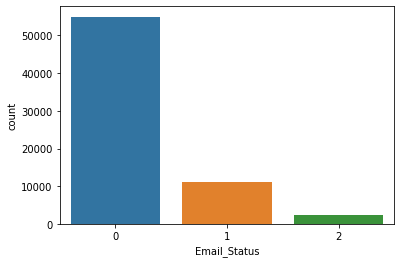

In [ ]:
sns.countplot('Email_Status',data=df)

Looking at the Target variable Email_Status there is an observation of imbalance of dataset. Imbalanced classification refers to a classification predictive modeling problem where the number of examples in the training dataset for each class label is not balanced. Close to 80% data is of class 0, 16% data is of class 1 and 4% is of class 2.

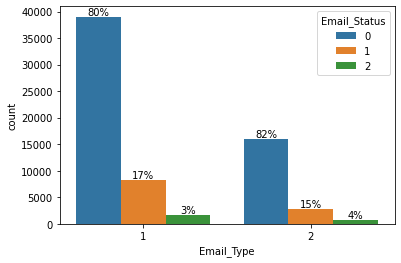

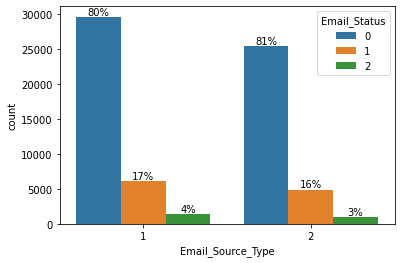

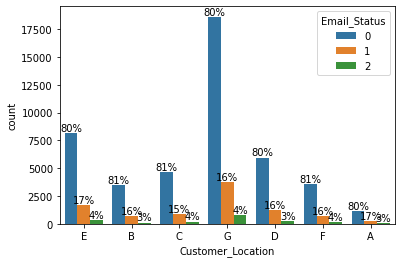

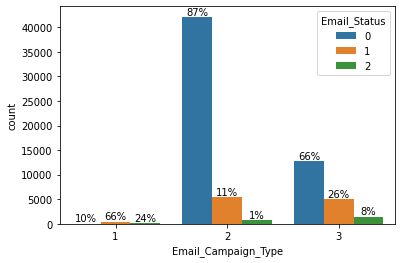

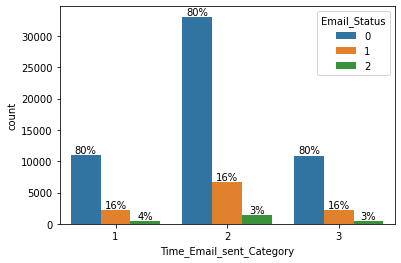

In [ ]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df[value], hue=df[Target_var[0]])
  unique = len([x for x in df[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()



*   The email type 1 which may be considered as promotional emails are sent more than email type 2 and hence are read and acknowledged more than the other type otherwise the proportion of ignored, read, acknowledged emails are kind of same in both email types.

*   Email source type shows kind of a similar pattern for both the categories.

*  In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledge are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as factor in people ignoring, reading or acknowledging our emails. Other factors should be responsible in why people are ignoring the emails not location.

*  In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

*  If we consider 1 and 3 as morning and night category in time email sent feature, it is obvious to think 2 as middle of the day and as expected there were more emails sent under 2nd category than either of the others, sending emails in the middle of the day could lead to reading and opening the email as people are generally working at that time and they frequently checkup their emails, but it cannot be considered as the major factor in leading to acknowledged emails.




The Customer_Location and Email ID feature does not affect Email_Status, We can drop Customer_Locaton feature.

In [ ]:
df = df.drop(['Email_ID'], axis = 1)

In [ ]:
df.isnull().sum()

Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

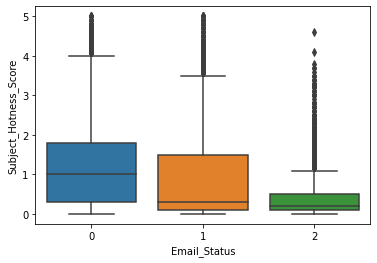

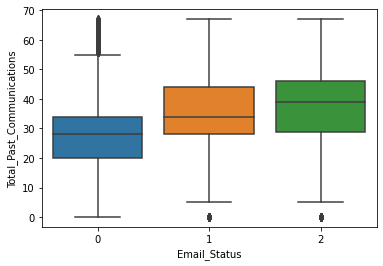

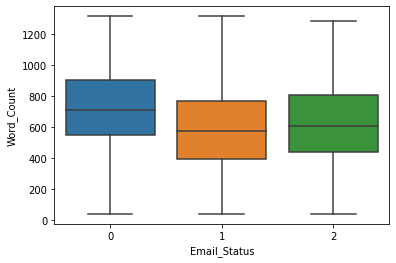

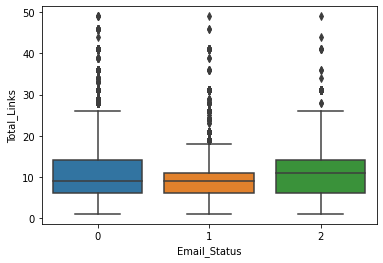

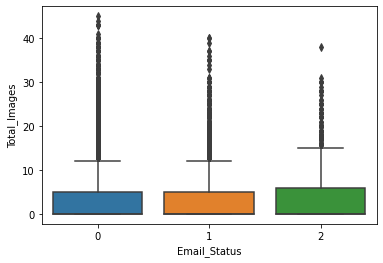

In [ ]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=df['Email_Status'], y= df[value])
 plt.show()

In the subject hotness score, median of ignored emails was around 1 with a few outliers. Acknowledged emails has the most outliers. It is observed that the Subject_Hotness_Score for read and acknowledged emails are much lower.

Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

The more the words in an email, the more it has a tendency to get ignored. Too lengthy emails are getting ignored.

The median is kind of similar in all of the three cases in total links feature with a number of outliers.

More images were there in ignored emails.

There are considerable number of outliers in Subject_Hotness_Score, Total_Links and Total_Images.

# Correlation

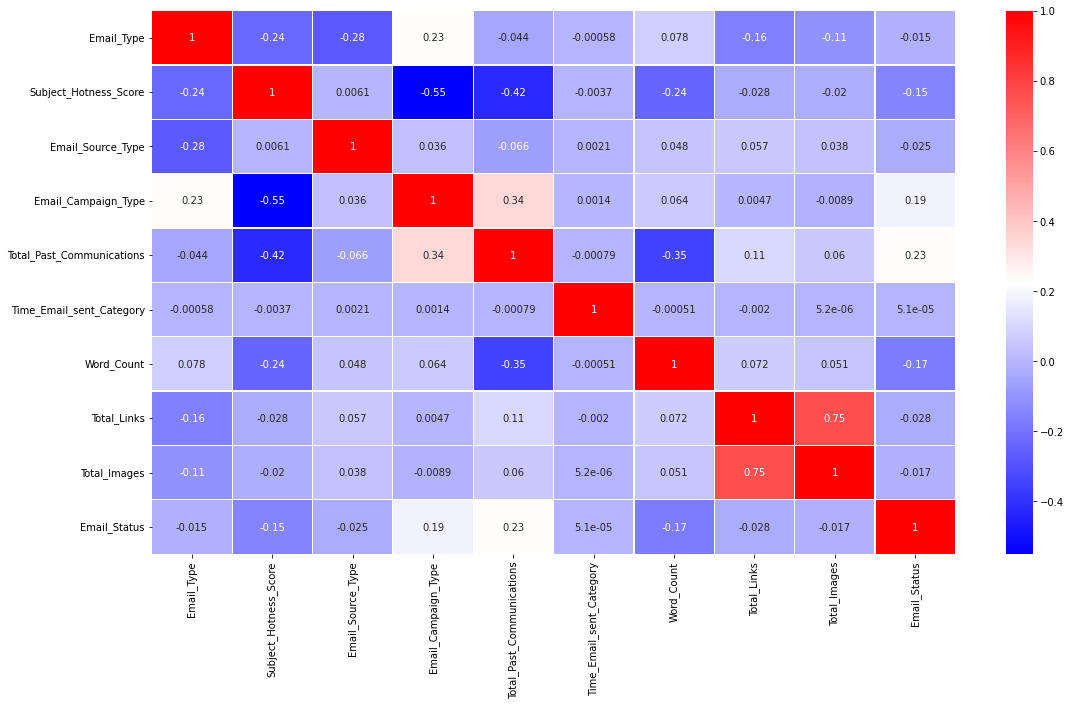

In [ ]:
#correlation matrix
correlation = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='bwr')

Correlation map shows

*  Email_status is correlated with Total_Past_Communications, and minorly correlated to others.

*  Email_Campaign_Type is highly correlated with Total_Past_Communications.


Outliers:

With the help of box-plots, we earlier saw that besides Word Count all our other continuous variables have outliers, but deleting them would lead to loss of information as our target variable is highly imbalanced we need to make sure that we aren't deleting more than 5% of information or data related to the minority class.

In [ ]:
#we can try combining them up
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [ ]:
#Let's check the number of outliers in each category of diff continuous features
cont_var.remove('Word_Count')
cont_var.remove('Total_Links')
cont_var.remove('Total_Images')
cont_var.append('Total_Img_links')

In [ ]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in cont_var:
  q_75, q_25 = np.percentile(df.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df.loc[df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Img_links': {0: 3061, 1: 437, 2: 122}}


We calculated the number of outliers with respect to the individual classes of our target variable. The minority class in our target variable is 1 and 2. But when we get rid of outliers we should check that we aren't deleting more than 5% of useful information related to minority class. Otherwise, the model will not be able to classify our minority classes correctly having lack of information. Let's check the percentage of outliers in minority class.

In [ ]:
#percentage of outliers in minority class
minority_outliers = 0  
majority_outliers = 0
for col in cont_var:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_maj = df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_min+total_maj))*100
print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907
The percentage of total outliers are 5.856363290565154


We have more than 5% outliers in minority section and hence to avoid lack of information, we decide against deleting them.

In [ ]:
#deleting majority outliers
for elem in cont_var:
  q_low = df[elem].quantile(0.01)
  q_hi  = df[elem].quantile(0.99)
  df = df.drop(df[(df[elem] > q_hi) &  (df['Email_Status']==0)].index)
  df = df.drop(df[(df[elem] < q_low) & (df['Email_Status']==0)].index)

In [ ]:
df.shape

(66914, 10)

Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

In [ ]:
#let's add back word count
cont_var.append('Word_Count')
#feature scaling of numerical variables
for elem in cont_var:
  df[elem] = (df[elem] - df[elem].mean()) / (df[elem].std())

df.head(1)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Img_links
0,1,1.163386,2,E,2,0.348093,1,-0.980426,0,-0.545194


## One hot encoding

In [ ]:
#getting dummy variables for categorical data
categorical_variables.remove('Customer_Location')

In [ ]:
categorical_variables

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [ ]:
#creating dummy variables
df = pd.get_dummies(df,columns=categorical_variables)
df.drop('Customer_Location',axis=1,inplace=True)
df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,1.163386,0.348093,-0.980426,0,-0.545194,1,0,0,1,0,1,0,0


In [ ]:
#Email_Status should be the last col
columns=list(df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
df=df[columns]
df.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,1.163386,0.348093,-0.980426,-0.545194,1,0,0,1,0,1,0,0,0
1,1.059812,-1.190757,-0.742878,-0.840058,0,1,0,1,0,0,1,0,0
2,-1.011655,0.604568,0.957075,-0.840058,0,1,0,0,1,0,1,0,1
3,1.991973,-0.335840,-0.349439,0.241111,1,0,0,1,0,0,1,0,0
4,-1.115229,-0.934282,0.901400,-0.938347,1,0,0,0,1,0,1,0,0


# Model Buidling

In [ ]:
#X and Y 
X = df.drop('Email_Status',axis=1)
y = df['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (66914, 12)
Shape of Y: (66914,)


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 

# Logistic Regression:

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [ ]:
#importing libraries
from sklearn.linear_model import LogisticRegression
#fitting Undersampling
logistic_rus = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_rus.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#Function to evaluate the model

def model_evaluation(model_name_RUS, model_var_rus, X_train, y_train, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification for Random Undersampling and SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
  
  #Making predictions
  y_pred_rus_train = model_var_rus.predict(X_train)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(X_train)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')

  #Precision RUS
  train_precision_rus = precision_score(y_train,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')

  #F1 Score RUS
  train_f1_rus = f1_score(y_train,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  print(classification_report(y_test,y_pred_rus_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

----- Evaluation on Random Undersampled data -----LogisticReg RUS------
--------------Test data ---------------

Confusion matrix 

[[7647 1441 1612]
 [ 699  480 1029]
 [ 102   58  315]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10700
           1       0.24      0.22      0.23      2208
           2       0.11      0.66      0.18       475

    accuracy                           0.63     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.63      0.68     13383



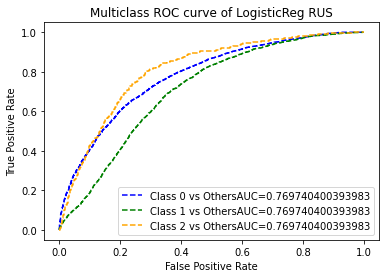

In [ ]:
#Let's evaluate logistic regression
logistic_reg_list = model_evaluation('LogisticReg RUS', logistic_rus, X_train, y_train, X_test, y_test)
logistic_reg_list

#Decison Tree Model:

In [ ]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier
#Classifier RUS
dt_rus = DecisionTreeClassifier()
dt_rus.fit(X_train,y_train)

DecisionTreeClassifier()

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------Test data ---------------

Confusion matrix 

[[8847 1557  296]
 [1352  671  185]
 [ 253  170   52]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     10700
           1       0.28      0.30      0.29      2208
           2       0.10      0.11      0.10       475

    accuracy                           0.72     13383
   macro avg       0.41      0.41      0.41     13383
weighted avg       0.73      0.72      0.72     13383



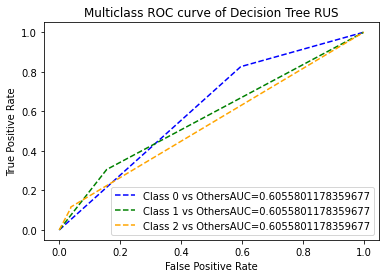

In [ ]:
dt_eval_list = model_evaluation('Decision Tree RUS', dt_rus, X_train, y_train, X_test, y_test)
dt_eval_list

# Random Forest Model:

In [ ]:
#importing library
from sklearn.ensemble import RandomForestClassifier
#RUS
rf_rus = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_rus.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

----- Evaluation on Random Undersampled data -----Random Forest RUS------
--------------Test data ---------------

Confusion matrix 

[[10698     2     0]
 [ 2027   181     0]
 [  434    41     0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     10700
           1       0.81      0.08      0.15      2208
           2       0.00      0.00      0.00       475

    accuracy                           0.81     13383
   macro avg       0.54      0.36      0.35     13383
weighted avg       0.78      0.81      0.74     13383



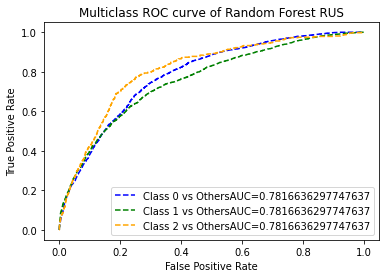

In [ ]:
#Random Forest Evaluation
rf_eval_list = model_evaluation('Random Forest RUS', rf_rus, X_train, y_train, X_test, y_test)
rf_eval_list

#XG Boost Model:
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The two reasons to use XGBoost are also the two goals of the project:

*  Execution Speed.
*  Model Performance.

In [ ]:
from xgboost import XGBClassifier
#fitting rus
xgb_rus = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_rus.fit(X_train,y_train)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on Random Undersampled data -----XGB RUS------
--------------Test data ---------------

Confusion matrix 

[[10420   267    13]
 [ 1705   459    44]
 [  337   128    10]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     10700
           1       0.54      0.21      0.30      2208
           2       0.15      0.02      0.04       475

    accuracy                           0.81     13383
   macro avg       0.51      0.40      0.41     13383
weighted avg       0.76      0.81      0.77     13383



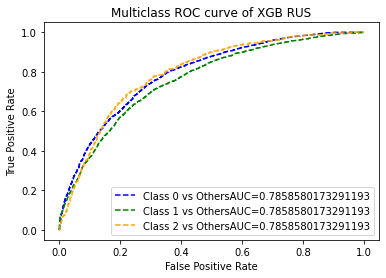

In [ ]:
#model evaluation of XGB
xgb_eval_list = model_evaluation('XGB RUS', xgb_rus, X_train, y_train, X_test, y_test)
xgb_eval_list

Random Forest model and XG boost model have highest accuracy as compared to other models, which means it is better at predicting sales than other models. So we'll use XG boost model.

In [ ]:
# getting weights of all the features used in the data
feature_importance = xgb_rus.feature_importances_
feature_importance

array([0.01078771, 0.0179525 , 0.01191031, 0.01048453, 0.01340905,
       0.00855532, 0.5482678 , 0.34438697, 0.0090703 , 0.00825378,
       0.0083395 , 0.00858229], dtype=float32)

In [ ]:
# features used
columns = list(X_train.columns)
columns

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Total_Img_links',
 'Email_Type_1',
 'Email_Source_Type_1',
 'Email_Campaign_Type_1',
 'Email_Campaign_Type_2',
 'Email_Campaign_Type_3',
 'Time_Email_sent_Category_1',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3']

In [ ]:
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df

,Features,Values
0,Subject_Hotness_Score,0.010788
1,Total_Past_Communications,0.017953
2,Word_Count,0.011910
3,Total_Img_links,0.010485
4,Email_Type_1,0.013409
5,Email_Source_Type_1,0.008555
6,Email_Campaign_Type_1,0.548268
7,Email_Campaign_Type_2,0.344387
8,Email_Campaign_Type_3,0.009070
9,Time_Email_sent_Category_1,0.008254


In [ ]:
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
6,Email_Campaign_Type_1,0.548268
7,Email_Campaign_Type_2,0.344387
1,Total_Past_Communications,0.017953
4,Email_Type_1,0.013409
2,Word_Count,0.011910
0,Subject_Hotness_Score,0.010788
3,Total_Img_links,0.010485
8,Email_Campaign_Type_3,0.009070
11,Time_Email_sent_Category_3,0.008582
5,Email_Source_Type_1,0.008555


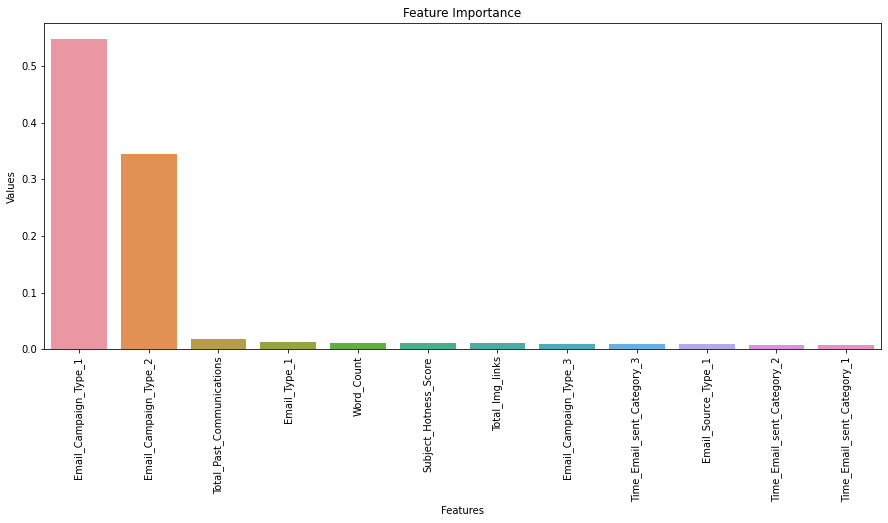

In [ ]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

## Conclusion:

* It was observed that both Time_Email_Sent and Customer_Location were
insignificant in determining the Email_status. The ratio of the Email_Status was the same irrespective of the demographic location or the time frame the emails were sent on.

* In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency it has to get ignored. Too lengthy emails are getting ignored.

* More images were there in ignored emails.

* There are outliers in almost every continuous variable except Word Count and upon analyzing, it was found that outliers make up for more than 5% of the minority data and will influence the results either way, so it was better not to get rid of them.

* Email Campaign Type 1 and 2 are doing better than 3. So, focusing on improving 3, can do the trick.

* The word count should be reasonable. The content should be crisp and to the point with a few marketing gimmicks.

* Total past communications had a positive influence, hence having a healthy relationship with customers is a big yes.